# *EdstatsData*

Le but de cette analyse de donnés est de voir si le dataset EdStatsData permet de determiner quels pays serraient intéréssants pour l'expansion d'une entreprise de formation en ligne pour le secondaire et le suppérieur. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## <u>Première partie : inspection préliminaire des données</u>

In [ ]:
df = pd.read_csv("drive/MyDrive/CSV/EdStatsData.csv", sep=',')
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Taille du dataset :<b>

In [ ]:
df.shape

(886930, 70)

<b>Noms des colonnes :<b>

In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

<b>Type des colonnes :<b>

In [ ]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

<b>% de remplissage des colonnes :<b>

In [ ]:
df.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

Text(0.5, 1.0, '% de remplissage des colonnes')

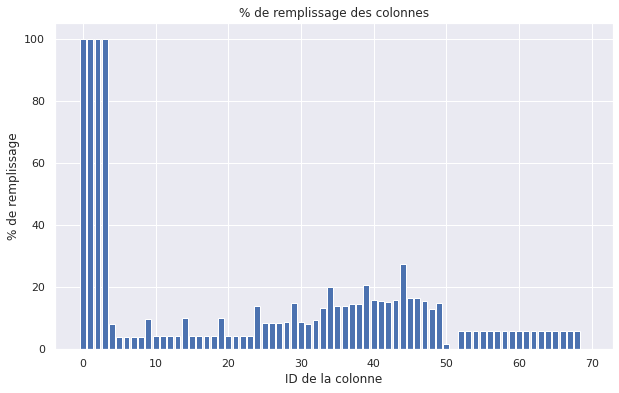

In [ ]:
sns.set_theme()
plt.figure(figsize=(10,6))
plt.bar([i for i in range(df.shape[1])], 100*(1-df.isna().mean()))
plt.xlabel('ID de la colonne')
plt.ylabel('% de remplissage')
plt.title('% de remplissage des colonnes')

<b>Nombre de doublons :<b>

In [ ]:
df.duplicated().sum()

0

<b>Nombre de pays ou régions :<b>

In [ ]:
df["Country Name"].nunique()

242

<b>Nombre d'indicateurs :<b>

In [ ]:
df["Indicator Name"].nunique()

3665

## <u>Deuxième partie : sélection des colonnes pertienentes à la problématique</u>

<p>L'identifiant de chaque pays et de chaque indicateur peut être mis à l'écart, le nom du pays/region et le nom de l'indicateur suffisent et ont l'avantage d'être explicites. <p\>
<p>Les colonnes concernant la mesure des indicateurs entre les années 1970 et 2000 ne sont pas qualitatives pour notre problématique selon moi (startup de cours en ligne, avant 2000 le net n'est pas démocratisé).<p\>
<p>Les colonnes concernant la mesure des indicateurs entre les années 2025 et 2100 ne sont pas qualitatives pour la problématique selon moi (ce ne sont que des prévisions lointaines qui de plus ne sont données que pour quelques indicateurs).<p\>
<p> <b>Identifiants des colonnes à utiliser :</b> <p\>

In [ ]:
column_id = [0,2]+[i+34 for i in range(19)]
column_names = df.columns[column_id]
column_names

Index(['Country Name', 'Indicator Name', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2020'],
      dtype='object')

<b>Selection des colonnes dans le dataframe :<b>

In [ ]:
df = df[column_names]
df.head(3)

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <u>Troisième partie : sélection des indicateurs les plus pertinents</u>

<p>Les indicateurs a choisir doivent selon moi possèder les propriétés suivantes :<p\>
<ul>
  <li>L'indicateur doit avoir été mesuré dans de nombreux pays pour que l'on puisse effectuer des comparaisons,</li>
  <li>L'indicateur ne doit pas posseder trop de valeurs manquantes entre 2000 et 2020 dans les pays où il a été mesuré,</li>
  <li>L'indicateur doit être utile pour la construction d'une réponse à la problématique, autrement dit :
    <ul>
    <li>indicateurs sur le nombre d'utilisateurs internet, </li>
    <li>indicateurs sur le nombre d'élèves inscrits dans le secondaire et supérieur </li>
    <li>indicateurs sur le nombre d'habitants diplômés </li>
    <li>indicateurs démongraphiques sur les 18-25 ans </li>
    <li>indicateurs économétriques du pays </li>
    </ul>
    </li>
</ul>


<b>Détermination de la qualité de chaque ligne : <b>

In [ ]:
df.loc[:, 'Remplissage'] = 100*(1-df.isnull().sum(axis=1)/df.shape[1])
df['Remplissage']

0          9.523810
1          9.523810
2          9.523810
3          9.523810
4         80.952381
            ...    
886925    19.047619
886926    19.047619
886927    19.047619
886928    19.047619
886929    19.047619
Name: Remplissage, Length: 886930, dtype: float64

<p><b> Suppression des lignes avec trop peu de données (inférieur au seuil) : </b></p>
J'ai attribué un % de remplissage à chaunce des lignes et on retire les lignes qui possèdent peu d'informations à l'aide d'un seuil.

In [ ]:
seuil = 75
df = df[df['Remplissage']>= seuil]
df = df.drop(columns=['Remplissage'])
df.shape

(84218, 21)

<b>Pourcentage de remplissage des colonnes aprés le tri : <b>

Text(0.5, 1.0, '% de remplissage des colonnes')

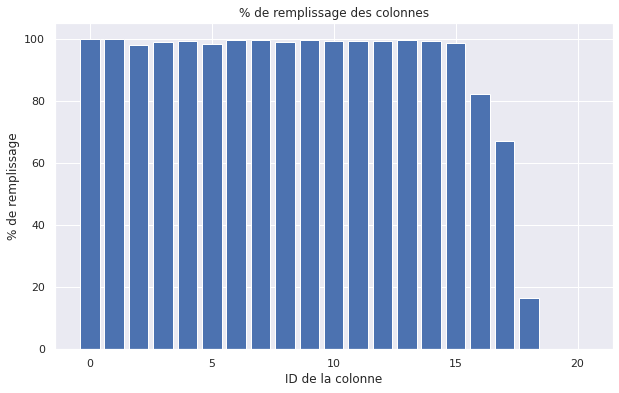

In [ ]:
sns.set_theme()
plt.figure(figsize=(10,6))
plt.bar([i for i in range(df.shape[1])], 100*(1-df.isna().mean()))
plt.xlabel('ID de la colonne')
plt.ylabel('% de remplissage')
plt.title('% de remplissage des colonnes')

<b>Indicateurs les plus représentés :</b>
<p>On cherche par la suite les indicateurs les plus représentés afin de pouvoir faire des comparaisons entre pays.</p>

In [ ]:
indicators = df.groupby("Indicator Name")["Country Name"].count().sort_values(ascending=False)
indicators

Indicator Name
Population growth (annual %)                                                                                  239
Population, total                                                                                             239
GDP at market prices (current US$)                                                                            222
GDP per capita (current US$)                                                                                  222
GDP at market prices (constant 2005 US$)                                                                      221
                                                                                                             ... 
Enrolment in Grade 6 of lower secondary general education, female (number)                                      1
Drop-out rate from Grade 4 of lower secondary general education, male (%)                                       1
Enrolment in early childhood educational development programmes, private 

<b>Sélection des indicateurs les plus représentes (présents dans au moins autant de pays que la valeur seuil) : </b>
<p>On retire tous les indicateurs qui n'ont pas été relevés dans suffisament de pays à l'aide d'une valeur seuil.</p>

In [ ]:
seuil = 100
indicators = indicators[indicators>=seuil]
indicators

Indicator Name
Population growth (annual %)                                                                       239
Population, total                                                                                  239
GDP at market prices (current US$)                                                                 222
GDP per capita (current US$)                                                                       222
GDP at market prices (constant 2005 US$)                                                           221
                                                                                                  ... 
Percentage of female students in secondary education enrolled in general programmes, female (%)    101
Percentage of male students in secondary education enrolled in general programmes, male (%)        101
Gross enrolment ratio, primary and secondary, both sexes (%)                                       101
Percentage of male students in secondary education enrolle

<b>Lecture des indicateurs dans un fichier CSV : <b>

In [ ]:
indicators_names = pd.Series(indicators.index.values)
indicators_names.to_csv("indicators.csv", index=True)
indicators_names

0                           Population growth (annual %)
1                                      Population, total
2                     GDP at market prices (current US$)
3                           GDP per capita (current US$)
4               GDP at market prices (constant 2005 US$)
                             ...                        
365    Percentage of female students in secondary edu...
366    Percentage of male students in secondary educa...
367    Gross enrolment ratio, primary and secondary, ...
368    Percentage of male students in secondary educa...
369    Gross intake ratio to Grade 1 of primary educa...
Length: 370, dtype: object

<b>Sélection des indicateurs utiles à la problématique parmi les plus représentés : </b>
<p>Dans la liste de indicateurs les plus représentatifs, on selectionne une dizaine d'indicateurs utiles à la problématique et qui sont présent dans le plus de pays (choix manuel). </p>

In [ ]:
index_list = [3,7,22,27,68,69,279,285,354,358]
indicators_selec = [indicators_names[i] for i in index_list]
indicators_selec

['GDP per capita (current US$)',
 'Internet users (per 100 people)',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Population of the official age for secondary education, both sexes (number)',
 'Population of the official age for tertiary education, female (number)',
 'Population of the official age for tertiary education, male (number)',
 'Gross enrolment ratio, secondary, both sexes (%)',
 'Gross enrolment ratio, upper secondary, both sexes (%)',
 'Gross enrolment ratio, tertiary, male (%)',
 'Gross enrolment ratio, tertiary, female (%)']

<b>Sélection des lignes possédant les indicateurs sélectionnés : <b>

In [ ]:
df = df[df["Indicator Name"].isin(indicators_selec)]
df.shape

(1720, 21)

<b>Selection des pays représentés par tous les indicateurs que l'on va utiliser :</b>
<p>On selectionne uniquement les pays où la totalité des indicateurs à bien été mesurée, on laisse donc certains pays de côté. Cependant il est nécéssaire que tout ces indicateurs soit diponibles pour que l'on puisse comparer les pays entre eux. </p>

In [ ]:
indicators_count = df["Country Name"].value_counts()
indicators_count = indicators_count[indicators_count == 10]
indicators_count = indicators_count.index.values.tolist()
df = df[df["Country Name"].isin(indicators_count)]
df.shape

(880, 21)

Text(0.5, 1.0, '% de remplissage des colonnes')

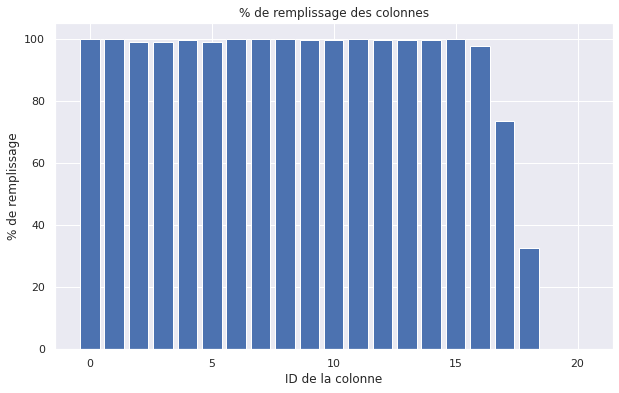

In [ ]:
plt.figure(figsize=(10,6))
plt.bar([i for i in range(df.shape[1])], 100*(1-df.isna().mean()))
plt.xlabel('ID de la colonne')
plt.ylabel('% de remplissage')
plt.title('% de remplissage des colonnes')

In [ ]:
df.isna().mean()

Country Name      0.000000
Indicator Name    0.000000
2000              0.010227
2001              0.010227
2002              0.005682
2003              0.011364
2004              0.002273
2005              0.002273
2006              0.002273
2007              0.004545
2008              0.004545
2009              0.002273
2010              0.004545
2011              0.003409
2012              0.004545
2013              0.002273
2014              0.022727
2015              0.263636
2016              0.673864
2017              1.000000
2020              1.000000
dtype: float64

<b>Suppression de colonnes supplémentaires : </b>
On se rend compte que les colonnes des années 2017 et 2020 sont totalement vides pour les indicateurs retenus. De ce fait on retire ces deux années du dataframe. 
De plus celle de 2016 est très vide également, on va essayer de la compléter dans la partie suivante.  

In [ ]:
df = df.drop(columns=['2017', '2020'])
df.shape

(880, 19)

Text(0.5, 1.0, '% de remplissage des colonnes')

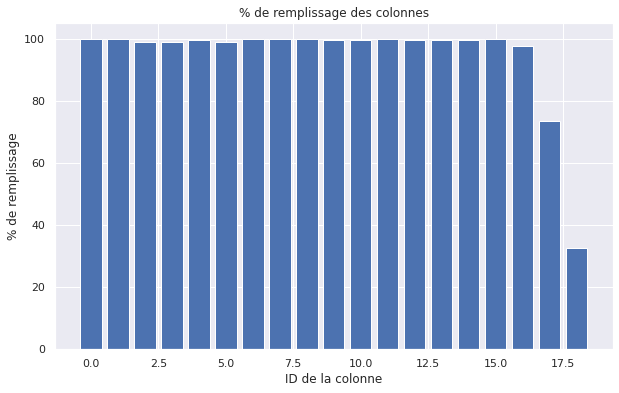

In [ ]:
plt.figure(figsize=(10,6))
plt.bar([i for i in range(df.shape[1])], 100*(1-df.isna().mean()))
plt.xlabel('ID de la colonne')
plt.ylabel('% de remplissage')
plt.title('% de remplissage des colonnes')

#<u> Quatrième partie : amélioration du dataset </u>
<p>J'ai fortement réduit la taille du dataset dans le but de sélectionner que des données pertinantes pour répondre à la quesiton. Cependant quelques colonnes ne sont pas complétement remplies et on cherche donc à les remplir afin de faire des annalyses par la suite. </p> 

<b>Remplissage des NaN de 2000 à 2003 : </b> on applique un remplissage de NaN par un bfill 

In [ ]:
df[['2000', '2001', '2002', '2003']] = df[['2000', '2001', '2002', '2003']].fillna(axis=1, method='bfill')
df[['2000', '2001', '2002', '2003']].isna().mean()

2000    0.000000
2001    0.000000
2002    0.001136
2003    0.011364
dtype: float64

<b>Remplissage des NaN compris entre deux valeurs bien définies : </b> je rempli les NaN entre deux valeurs bien définies au cours du temps par la moyenne entre ces deux.

In [ ]:
for col in range(2,df.shape[1]-1,1):
  for i in range(df.shape[0]):
    if pd.isnull(df.iloc[i, col]) and pd.notnull(df.iloc[i, col+1]) and pd.notnull(df.iloc[i, col-1]):
      df.iloc[i, col] = (df.iloc[i, col+1] + df.iloc[i, col-1])/2
df.isna().mean()

Country Name      0.000000
Indicator Name    0.000000
2000              0.000000
2001              0.000000
2002              0.001136
2003              0.001136
2004              0.001136
2005              0.000000
2006              0.000000
2007              0.000000
2008              0.000000
2009              0.000000
2010              0.000000
2011              0.000000
2012              0.000000
2013              0.000000
2014              0.015909
2015              0.263636
2016              0.673864
dtype: float64

<b>Remplissage du reste des NaN : </b> je rempli le reste des NaN par un ffil

In [ ]:
df = df.fillna(axis=1, method='ffill')
df.isna().mean()

Country Name      0.0
Indicator Name    0.0
2000              0.0
2001              0.0
2002              0.0
2003              0.0
2004              0.0
2005              0.0
2006              0.0
2007              0.0
2008              0.0
2009              0.0
2010              0.0
2011              0.0
2012              0.0
2013              0.0
2014              0.0
2015              0.0
2016              0.0
dtype: float64

# <u>Cinquième partie : création d'indicateurs synthétiques </u>
    
<p>Dans un premier temps on essaie de construire des indicateurs sythétiques utiles à notre problématique à l'aide des features sélectionnées.
Dans un second temps on essaie d'attribuer un score à chaque pays/région à l'aide de ces indicateurs sythétiques. 
Finalement on essaie de fournir des résultats pertinants qui pourraient répondre à la problématique. </p>
<p>On construit 4 indicateurs sythétiques : 
    <ul>
        <li>Indicateur économique à partir du GDP : IND_GDP
        <li>Indicateur internet : IND_INT
        <li>Indicateur de population cible : IND_POP
        <li>Indicateur d'engegment scolaire : IND_SCO
     <ul/>
<p/>


<b>Préparations pour ce qui suit :<b>

In [ ]:
annees_str = df.columns[2:].values
annees_int = df.columns[2:].values.astype('int')
pays = df["Country Name"].unique()

### <b>Définition de l'indicateur économique :</b>  
$$\text{IND_GDP} = \frac{\text{GDP per capita}}{\text{max des GDP per Capita}}$$
<p>Il s'agit juste de créer une échelle entre 0 et 1.<p>

In [ ]:
# Calcul du max par année
data = df[df["Indicator Name"]=='GDP per capita (current US$)']
harmo = []
for y in annees_str :
    harmo.append(data[y].max())
harmo = np.array(harmo)

#Création d'un dataframe avec les années en index, le max en première colonne
IND_GDP = pd.DataFrame(data=harmo, index=annees_int, columns=['harmo'])

#Transformation des NAN de max en la valeur médianne de la Series
IND_GDP = IND_GDP.fillna(IND_GDP["harmo"].median())

#Calcul de l'indice pour chaque pays par année puis addition de la colonne au Dataframe IND_GDP
for p in pays :
    vals = df.loc[(df["Country Name"]==p) & (df["Indicator Name"]=='GDP per capita (current US$)'), annees_str].values
    indicateurs_GDP = np.transpose((vals/harmo))
    IND_GDP[p] = indicateurs_GDP

IND_GDP.head(3)

,harmo,Arab World,East Asia & Pacific,East Asia & Pacific (excluding high income),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),European Union,Heavily indebted poor countries (HIPC),High income,...,Switzerland,Tajikistan,Thailand,Tunisia,Turkey,Ukraine,United Kingdom,United States,Uzbekistan,West Bank and Gaza
2000,38532.040875,0.067883,0.105255,0.024986,0.523984,0.301728,0.047061,0.468472,0.008501,0.668767,...,0.982775,0.003593,0.052101,0.057456,0.112025,0.016498,0.72621,0.945962,0.014487,0.03831
2001,38549.589341,0.065243,0.096984,0.026308,0.530287,0.304052,0.046868,0.472572,0.007851,0.657589,...,0.999725,0.004431,0.049109,0.058494,0.080924,0.020253,0.711488,0.966901,0.011847,0.034645
2002,43061.150381,0.058042,0.087477,0.02585,0.514001,0.297237,0.048043,0.460188,0.007419,0.609532,...,0.960875,0.004398,0.048676,0.054482,0.084997,0.020424,0.691714,0.886322,0.008902,0.026851


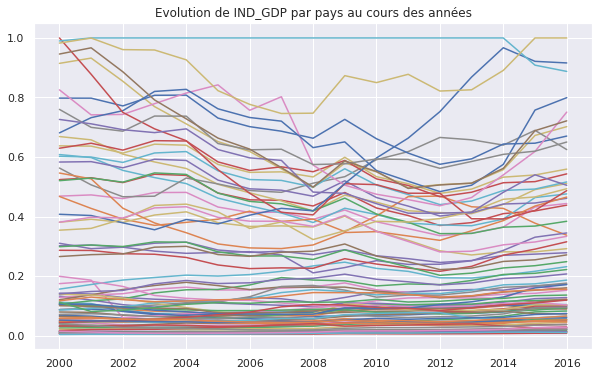

In [ ]:
# Visualisation rapide de l'évolution de l'indice IND_GDP par pays
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Evolution de IND_GDP par pays au cours des années")
for p in pays :
    ax.plot(IND_GDP.index, IND_GDP[p])

### <b>Définition de l'indicateur internet :</b>
$$\text{IND_INT} = \frac{\text{Internet users (per 100 people)}}{100}$$
<p>Il s'agit juste de borner les valeurs entre 0 et 1.<p>

In [ ]:
# Création d'un dataframe vide
IND_INT = pd.DataFrame(data=None, index=annees_int, columns=None)

#Ajout des valeurs de 'Internet users (per 100 people)' au DataFrame
for p in pays :
    vals = df.loc[(df["Country Name"]==p) & (df["Indicator Name"]=='Internet users (per 100 people)'), annees_str].values
    indicateurs_INT = np.transpose(vals/100)
    IND_INT[p] = indicateurs_INT

IND_INT.head(3)

,Arab World,East Asia & Pacific,East Asia & Pacific (excluding high income),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),European Union,Heavily indebted poor countries (HIPC),High income,Latin America & Caribbean,...,Switzerland,Tajikistan,Thailand,Tunisia,Turkey,Ukraine,United Kingdom,United States,Uzbekistan,West Bank and Gaza
2000,0.011395,0.055927,0.018971,0.225243,0.131841,0.020235,0.205567,0.001734,0.306894,0.039037,...,0.471,0.000486,0.03689,0.027507,0.037617,0.007162,0.268218,0.430792,0.004843,0.011113
2001,0.015613,0.072522,0.027791,0.273514,0.164056,0.029773,0.252995,0.002576,0.367568,0.056508,...,0.551,0.000513,0.055563,0.04298,0.051895,0.012388,0.334811,0.490808,0.005976,0.018369
2002,0.026931,0.089936,0.04405,0.351915,0.230575,0.051554,0.351395,0.003951,0.452257,0.088873,...,0.614,0.000555,0.075313,0.052529,0.1138,0.018739,0.5648,0.587854,0.010819,0.031001


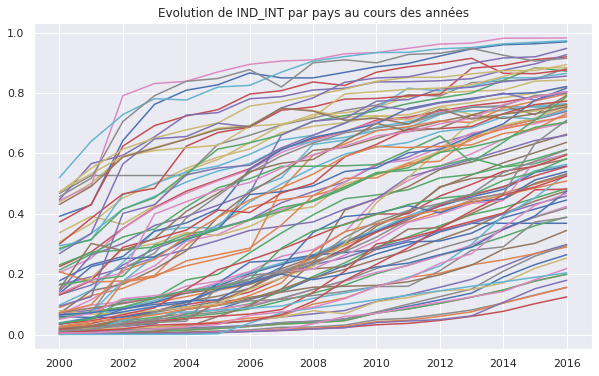

In [ ]:
# Visualisation rapide de l'évolution de l'indice IND_GDP par pays
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Evolution de IND_INT par pays au cours des années")
for p in pays :
    ax.plot(IND_INT.index, IND_INT[p])

### <b>Définition de l'indicateur population cible :</b>

$$ \text{IND_POP} = \frac{\sqrt{ \text{PUS + PS + PT} }}{\max (\sqrt{\text{PUS + PS + PT}})} $$
<p>où PUS : 'Population of the official age for upper secondary education', PU : 'Population of the official age for secondary education', et PT : 'Population of the official age for tertiary education'. </p>
<p>On somme l'ensemble des groupes ayant l'age de la population cible. On applique la fonction racine pour atténuer l'effet des pays extremement peuplés. On fait le rapport avec le maximum que l'on pourrait trouver.</p>
<p>On ferra attention de ne pas comparer les pays avec les régions donc de séparer les max. <p/>

In [ ]:
#Exportation du nom des pays pour identification des grandes régions
pd.Series(pays).to_csv("pays_regions.csv", index=False)
#Séparation des régions et pays, et retrait des trop grosses régions (monde entier par exemple)
regions = pd.Series(pays[:25])
regions = regions.drop(labels=[7, 8, 11, 12, 13, 14, 17, 19, 23, 24])
pays_only = pd.Series(pays[25:])

In [ ]:
# Selection des données
data = df[(df["Indicator Name"]=='Population of the official age for upper secondary education, both sexes (number)')
          | (df["Indicator Name"]=='Population of the official age for secondary education, both sexes (number)')
          | (df["Indicator Name"]=='Population of the official age for tertiary education, female (number)')
          | (df["Indicator Name"]=='Population of the official age for tertiary education, male (number)')]

#Création d'un dataframe vide
IND_POP = pd.DataFrame(data=None, index=annees_int, columns=None)

#Calcul de la somme PUS + PS + PT par pays/region par an
for p in pays :
    vals = data.loc[data["Country Name"]==p, annees_str].sum().values
    IND_POP[p] = vals

In [ ]:
#Calcul des max par an (séparation des max entre régions et pays)
max_region = []
for y in annees_int :
    max_region.append(IND_POP.loc[y,regions].max())
max_pays = []
for y in annees_int :
    max_pays.append(IND_POP.loc[y,pays_only].max())

    #Racine des valeurs max par année
max_region = np.sqrt(np.array(max_region)).round(2)
max_pays = np.sqrt(np.array(max_pays)).round(2)

In [ ]:
#Transformation des valeurs des vers leurs racine dans le dataframe temporaire
for c in IND_POP.columns :
    IND_POP[c] = np.sqrt(IND_POP[c].astype(float)).round(2)
    
#Division des valeurs du dataframe par les valeurs max associées
for p in pays_only :
    IND_POP[p] = IND_POP[p]/max_pays
for r in regions :
    IND_POP[r] = IND_POP[r]/max_region
IND_POP.head()

,Arab World,East Asia & Pacific,East Asia & Pacific (excluding high income),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),European Union,Heavily indebted poor countries (HIPC),High income,Latin America & Caribbean,...,Switzerland,Tajikistan,Thailand,Tunisia,Turkey,Ukraine,United Kingdom,United States,Uzbekistan,West Bank and Gaza
2000,0.424224,1.0,0.959802,0.358045,0.630925,0.451073,0.454322,11695.13,14409.05,0.556540,...,0.061890,0.074692,0.210802,0.097095,0.228587,0.172664,0.183496,0.402272,0.147680,0.054981
2001,0.423159,1.0,0.961496,0.352141,0.622985,0.446534,0.447269,11878.94,14404.68,0.547844,...,0.061519,0.075631,0.207920,0.096889,0.226737,0.169995,0.183002,0.401853,0.148788,0.055591
2002,0.422303,1.0,0.962979,0.346603,0.613269,0.440442,0.439059,12050.53,14406.00,0.542545,...,0.061448,0.076395,0.206012,0.096666,0.224952,0.167186,0.183660,0.401786,0.149694,0.056175
2003,0.423393,1.0,0.964255,0.341555,0.605103,0.434629,0.433303,12228.49,14425.96,0.537194,...,0.061386,0.077194,0.204176,0.096344,0.223290,0.164182,0.184110,0.401601,0.150433,0.056683
2004,0.422857,1.0,0.965281,0.337362,0.598332,0.429896,0.427965,12414.14,14452.00,0.534857,...,0.061341,0.077975,0.202437,0.095916,0.221716,0.160988,0.184284,0.401426,0.151028,0.057180


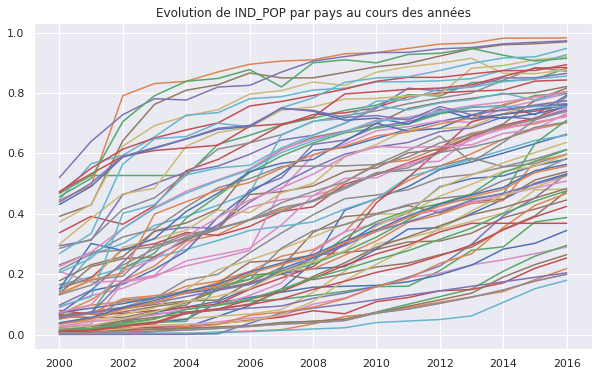

In [ ]:
# Visualisation rapide de l'évolution de l'indice IND_POP par pays
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Evolution de IND_POP par pays au cours des années")
for p in pays_only :
    ax.plot(IND_POP.index, IND_INT[p])
for r in regions :
    ax.plot(IND_POP.index, IND_INT[r])

### <b>Définition de l'indicateur engagement scolaire :</b>
$$\text{IND_SCO} = \frac{\text{PS}\times\text{ERS}+\text{PUS}\times \text{ERUS}+\text{PT}\times \text{ERT}}{\text{PS + PUS + PT}}$$
<p>Il s'agit d'une moyenne des indicateurs scolaires :
<ul>
    <li>ERS : 'Gross enrolment ratio, secondary, both sexes (%)'
    <li>ERUS : 'Gross enrolment ratio, upper secondary, both sexes (%)'
    <li>ERT : moyenne de 'Gross enrolment ratio, tertiary, male (%)' et 'Gross enrolment ratio, tertiary, female (%)'
</ul>
où on a pondéré chaque terme par la population de chaque catégorie. <p>

In [ ]:
# Selection des données
data = df[(df["Indicator Name"]=='Population of the official age for upper secondary education, both sexes (number)')
          | (df["Indicator Name"]=='Population of the official age for secondary education, both sexes (number)')
          | (df["Indicator Name"]=='Population of the official age for tertiary education, female (number)')
          | (df["Indicator Name"]=='Population of the official age for tertiary education, male (number)') 
          | (df["Indicator Name"]=='Gross enrolment ratio, secondary, both sexes (%)')
          | (df["Indicator Name"]=='Gross enrolment ratio, upper secondary, both sexes (%)')
          | (df["Indicator Name"]=='Gross enrolment ratio, tertiary, male (%)')
          | (df["Indicator Name"]=='Gross enrolment ratio, tertiary, female (%)')
         ]

In [ ]:
# Création d'un dataframe vide
IND_SCO = pd.DataFrame(data=None, index=annees_int, columns=None)

#Ajout des valeurs dans le dataframe
for p in pays :
    secondary_r = data.loc[(data["Country Name"]==p)
                           &(data["Indicator Name"]=='Gross enrolment ratio, secondary, both sexes (%)')
                           , annees_str
                          ].to_numpy()
    up_secondary_r = data.loc[(data["Country Name"]==p)
                              &(data["Indicator Name"]=='Gross enrolment ratio, upper secondary, both sexes (%)')
                              , annees_str
                             ].to_numpy()
    tertiary_fem_r = data.loc[(data["Country Name"]==p)
                              &(data["Indicator Name"]=='Gross enrolment ratio, tertiary, female (%)')
                              , annees_str
                             ].to_numpy()
    tertiary_male_r = data.loc[(data["Country Name"]==p)
                               &(data["Indicator Name"]=='Gross enrolment ratio, tertiary, male (%)')
                               , annees_str
                              ].to_numpy()
    secondary_pop = data.loc[(data["Country Name"]==p)
                             &(data["Indicator Name"]=='Population of the official age for secondary education, both sexes (number)')
                             , annees_str
                            ].to_numpy()
    up_secondary_pop = data.loc[(data["Country Name"]==p)
                                &(data["Indicator Name"]=='Population of the official age for upper secondary education, both sexes (number)')
                                , annees_str
                               ].to_numpy()
    tertiary_fem_pop = data.loc[(data["Country Name"]==p)
                                &(data["Indicator Name"]=='Population of the official age for tertiary education, female (number)')
                                , annees_str
                               ].to_numpy()
    tertiary_male_pop = data.loc[(data["Country Name"]==p)
                                &(data["Indicator Name"]=='Population of the official age for tertiary education, male (number)')
                                 , annees_str
                               ].to_numpy()
    tot = secondary_pop + up_secondary_pop + tertiary_fem_pop + tertiary_male_pop
    vals = ((secondary_r*secondary_pop + up_secondary_r*up_secondary_pop 
            + tertiary_fem_pop*tertiary_fem_r + tertiary_male_r*tertiary_male_pop
           )/tot)/100
    IND_SCO[p] = np.transpose(vals)

IND_SCO.head(3)

,Arab World,East Asia & Pacific,East Asia & Pacific (excluding high income),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),European Union,Heavily indebted poor countries (HIPC),High income,Latin America & Caribbean,...,Switzerland,Tajikistan,Thailand,Tunisia,Turkey,Ukraine,United Kingdom,United States,Uzbekistan,West Bank and Gaza
2000,0.429003,0.431276,0.393118,0.8586,0.776905,0.698985,0.840653,0.148025,0.837961,0.605823,...,0.742825,0.530766,0.510621,0.531985,0.531216,0.833297,0.894094,0.826731,0.657989,0.596887
2001,0.440759,0.436576,0.400624,0.873253,0.795255,0.720628,0.857092,0.155359,0.848202,0.611965,...,0.750127,0.552882,0.525499,0.557322,0.602842,0.851795,0.895687,0.835216,0.706946,0.616489
2002,0.448096,0.445249,0.41105,0.882895,0.811602,0.74179,0.870512,0.161948,0.863761,0.624314,...,0.738825,0.561083,0.531016,0.569373,0.64312,0.873539,0.912946,0.867182,0.70658,0.639878


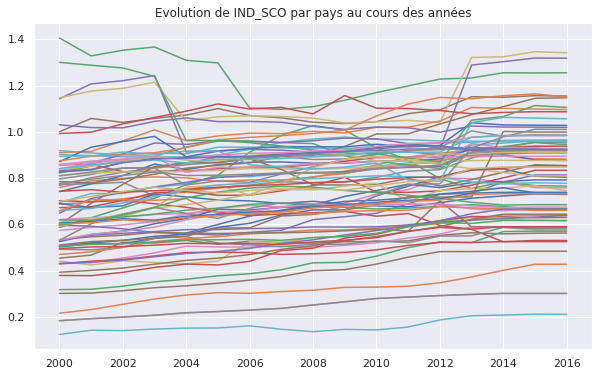

In [ ]:
# Visualisation rapide de l'évolution de l'indice IND_SCO par pays
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Evolution de IND_SCO par pays au cours des années")
for p in pays_only :
    ax.plot(IND_SCO.index, IND_SCO[p])
for r in regions :
    ax.plot(IND_SCO.index, IND_SCO[r])

# <u>Sixième partie : attribution de scores</u>

### <b>Définition du score 1 de chaque pays ou région : </b>
$$ \text{SC1}=\frac{\text{IND_GDP + IND_INT + IND_POP + IND_SCO}}{4}\times 100 $$
<p>Il s'agit simplement d'une moyenne des 4 indicateurs définits précédement. </p>

In [ ]:
# Création d'un dataframe vide
SCO1 = pd.DataFrame(data=None, index=annees_int, columns=None)

#Calcul du score pour chaque pays
for p in pays_only :
    gdp = IND_GDP[p]
    internet = IND_INT[p]
    pop = IND_POP[p]
    sco = IND_SCO[p]
    sc = ((gdp + internet + pop + sco)/4)*100
    SCO1[p]= sc
#Calcul du score pour chaque région
for r in regions :
    gdp = IND_GDP[r]
    internet = IND_INT[r]
    pop = IND_POP[r]
    sco = IND_SCO[r]
    sc = ((gdp + internet + pop + sco)/4)*100
    SCO1[r]= sc
    
SCO1.head()

,Albania,Argentina,Australia,Austria,Belgium,Belize,Brunei Darussalam,Bulgaria,Cabo Verde,Chile,...,Europe & Central Asia (excluding high income),European Union,Latin America & Caribbean,Latin America & Caribbean (excluding high income),Middle East & North Africa,Middle East & North Africa (excluding high income),North America,South Asia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income)
2000,14.798489,29.813281,63.392429,47.543107,52.811254,15.378476,28.686688,23.444664,12.779953,27.466186,...,30.433834,49.225356,32.831475,32.209535,26.668396,24.742939,63.566112,32.452052,21.070359,21.067652
2001,15.289871,30.855041,61.52154,48.890109,54.815399,15.666189,29.002648,24.154302,12.612395,28.732333,...,31.09507,50.748223,33.094738,32.442677,26.918248,24.999868,65.714417,32.455481,21.318114,21.315419
2002,15.556832,28.243484,61.143476,46.848919,58.46556,16.914719,28.971293,24.711862,13.252673,29.100544,...,32.045713,53.028875,33.521115,32.876164,27.149108,25.269261,66.652514,32.760329,21.511899,21.509254
2003,16.242214,28.790157,61.53883,49.182679,60.716234,17.122435,29.878877,24.194586,13.360428,30.446638,...,33.061649,55.252541,33.565879,32.889126,27.598682,25.68132,65.579739,33.069461,21.82459,21.822051
2004,16.92708,29.895641,61.630371,52.013393,53.533091,17.745359,33.484919,26.376321,13.451338,31.735972,...,33.671783,56.079743,34.694742,34.037249,28.58339,26.665427,64.952212,33.286775,22.265139,22.262431


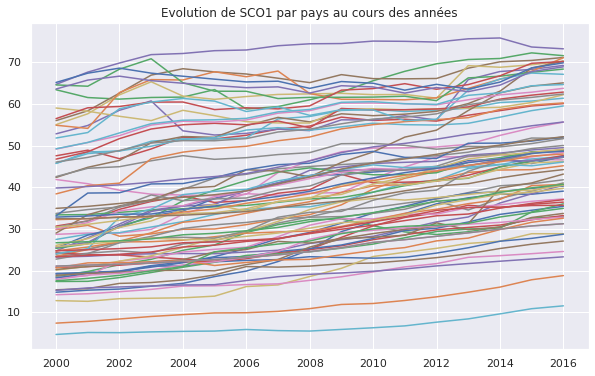

In [ ]:
# Visualisation rapide de l'évolution de l'indice SCO1 par pays
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Evolution de SCO1 par pays au cours des années")
for c in SCO1.columns :
    ax.plot(SCO1.index, SCO1[c])

### <b>Définition du score 2 de chaque pays ou région : </b>
$$ \text{SC2}=\sqrt[4]{\text{IND_GDP} \times \text{IND_INT} \times \text{IND_POP} \times \text{IND_SCO}} \times 100 $$
<p>Il s'agit simplement d'une moyenne géométrique des 4 indicateurs définits précédement. </p>

In [ ]:
# Création d'un dataframe vide
SCO2 = pd.DataFrame(data=None, index=annees_int, columns=None)

#Calcul du score pour chaque pays
for p in pays_only :
    gdp = IND_GDP[p]
    internet = IND_INT[p]
    pop = IND_POP[p]
    sco = IND_SCO[p]
    sc = ((gdp*internet*pop*sco)**0.25)*100
    SCO2[p]= sc
#Calcul du score pour chaque région
for r in regions :
    gdp = IND_GDP[r]
    internet = IND_INT[r]
    pop = IND_POP[r]
    sco = IND_SCO[r]
    sc = ((gdp*internet*pop*sco)**0.25)*100
    SCO2[r]= sc
SCO2.head()

,Albania,Argentina,Australia,Austria,Belgium,Belize,Brunei Darussalam,Bulgaria,Cabo Verde,Chile,...,Europe & Central Asia (excluding high income),European Union,Latin America & Caribbean,Latin America & Caribbean (excluding high income),Middle East & North Africa,Middle East & North Africa (excluding high income),North America,South Asia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income)
2000,3.125332,20.431662,43.764589,33.507935,34.876115,7.620267,14.13563,10.478162,4.765198,20.047353,...,13.163447,43.792971,19.588337,18.608345,13.3229,9.377283,58.795294,6.335995,5.38005,5.375372
2001,4.211382,21.973452,43.30328,34.711772,35.789899,7.614663,15.252279,11.662713,5.252233,20.505163,...,14.556719,46.269443,21.242098,20.328617,14.015979,10.191109,61.137942,6.90719,5.65417,5.648702
2002,4.404633,17.037275,42.63402,33.473448,39.257676,7.706578,15.663525,12.334616,5.654805,20.542629,...,16.866127,49.860581,22.498299,21.711121,15.738304,12.279085,62.739758,8.310059,5.97775,5.971887
2003,5.736484,17.897251,42.795755,35.228864,40.690614,8.082926,16.531739,13.500769,6.101736,21.05468,...,18.957126,52.583079,22.974626,22.194595,16.857511,13.32284,62.029679,8.853666,6.604007,6.59899
2004,7.430562,19.75205,43.664522,37.357143,38.421944,8.421066,18.708423,15.319622,6.378804,22.343049,...,21.432091,53.752051,24.509949,23.759509,19.090675,15.506856,61.587732,9.270328,7.322107,7.316089


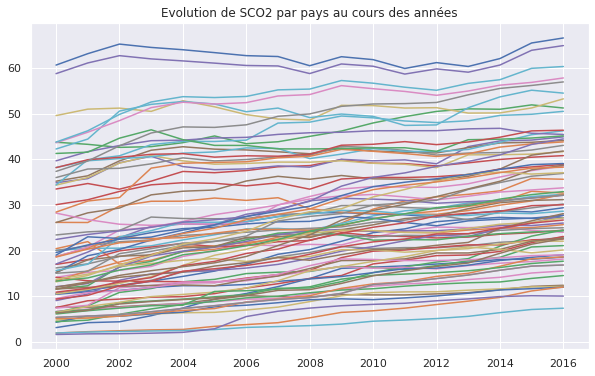

In [ ]:
# Visualisation rapide de l'évolution de l'indice SCO2 par pays
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Evolution de SCO2 par pays au cours des années")
for c in SCO2.columns :
    ax.plot(SCO2.index, SCO2[c])

### <b>Définition du score 3 de chaque pays ou région : </b>
$$ \text{SC3}=\frac{\text{IND_GDP} + 2\text{IND_INT} + \text{IND_POP} + 2\text{IND_SCO}}{6} \times 100 $$
<p>Il s'agit simplement d'une moyenne pondérée des 4 indicateurs définits précédement. On donne plus de poids ici à l'accés internet et l'engagement scolaire.</p>

In [ ]:
# Création d'un dataframe vide
SCO3 = pd.DataFrame(data=None, index=annees_int, columns=None)

#Calcul du score pour chaque pays
for p in pays_only :
    gdp = IND_GDP[p]
    internet = IND_INT[p]
    pop = IND_POP[p]
    sco = IND_SCO[p]
    sc = ((gdp + 2*internet + pop + 2*sco)/6)*100
    SCO3[p]= sc
#Calcul du score pour chaque région
for r in regions :
    gdp = IND_GDP[r]
    internet = IND_INT[r]
    pop = IND_POP[r]
    sco = IND_SCO[r]
    sc = ((gdp + 2*internet + pop + 2*sco)/6)*100
    SCO3[r]= sc
SCO3.head()

,Albania,Argentina,Australia,Austria,Belgium,Belize,Brunei Darussalam,Bulgaria,Cabo Verde,Chile,...,Europe & Central Asia (excluding high income),European Union,Latin America & Caribbean,Latin America & Caribbean (excluding high income),Middle East & North Africa,Middle East & North Africa (excluding high income),North America,South Asia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income)
2000,18.320388,33.703296,73.488938,51.62773,59.15965,18.811627,30.183609,29.404487,16.17132,32.651096,...,32.276223,50.253906,32.635321,32.068289,26.480467,24.887977,63.538144,26.737541,17.185417,17.182872
2001,18.913753,35.328665,71.936614,53.449501,61.884,19.171876,31.271878,30.302294,15.929863,34.557943,...,33.23673,52.333611,33.204371,32.598905,26.852229,25.231379,66.139705,26.796481,17.521345,17.518804
2002,19.28226,33.96427,72.095896,51.118546,67.055208,20.936876,31.828243,31.020344,16.795425,35.306407,...,34.5862,55.71771,34.233876,33.631908,27.33932,25.71862,68.725256,27.301799,17.795772,17.793268
2003,20.129948,34.596568,72.589764,53.732977,69.531341,21.365185,33.386799,30.181478,16.877695,37.236093,...,35.968584,58.441791,34.562578,33.91153,27.9907,26.297668,68.749776,27.787729,18.187063,18.184616
2004,20.972071,35.956434,71.693077,57.565656,59.879143,22.309118,38.027429,33.033376,17.011031,38.750919,...,36.733652,59.622984,36.116043,35.490375,29.33401,27.646672,68.884943,28.126341,18.721273,18.718583


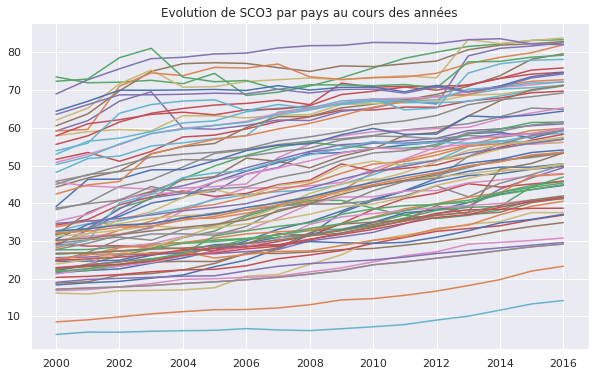

In [ ]:
# Visualisation rapide de l'évolution de l'indice SCO3 par pays
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Evolution de SCO3 par pays au cours des années")
for c in SCO3.columns :
    ax.plot(SCO3.index, SCO3[c])

# <u>Septième partie : analyse</u>

On s'interesse maintenant à donner des résultats qualitatifs à la question de l'ouverture à l'international de la société. Les pays ont été classés selon trois scores et on va tenter d'identifier une stratégie qui serrait intéréssante de la part de l'entreprise. 

### <b>Classification des grandes régions :<b>

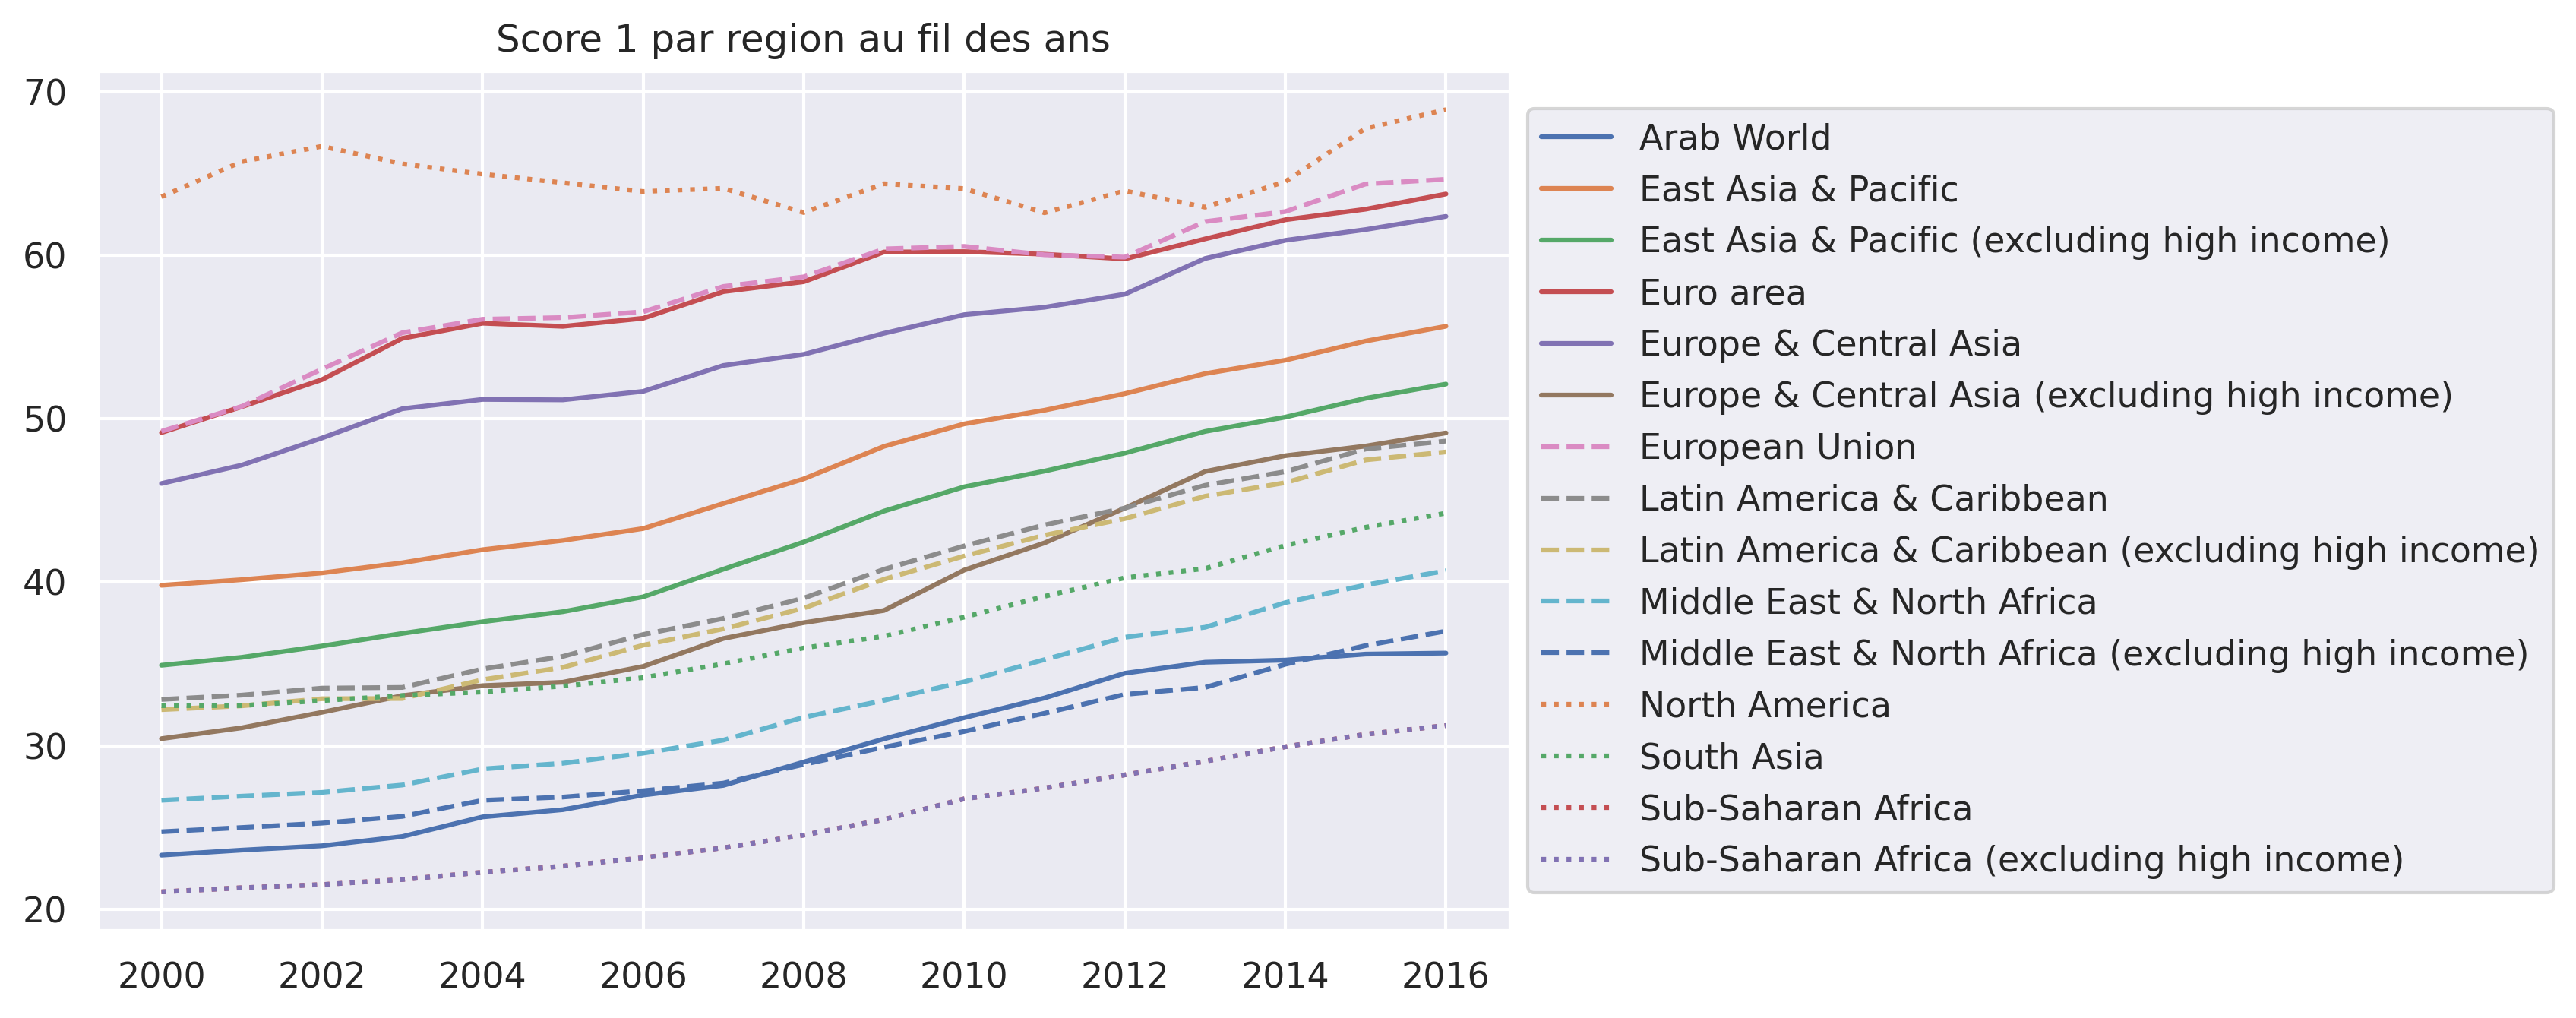

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=300)
ax.set_title("Score 1 par region au fil des ans")
for r in regions[:6] :
    ax.plot(annees_int, SCO1[r], label=r, linestyle='-')
for r in regions[6:11] :
    ax.plot(annees_int, SCO1[r], label=r, linestyle='--')
for r in regions[11:] :
    ax.plot(annees_int, SCO1[r], label=r, linestyle=':')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

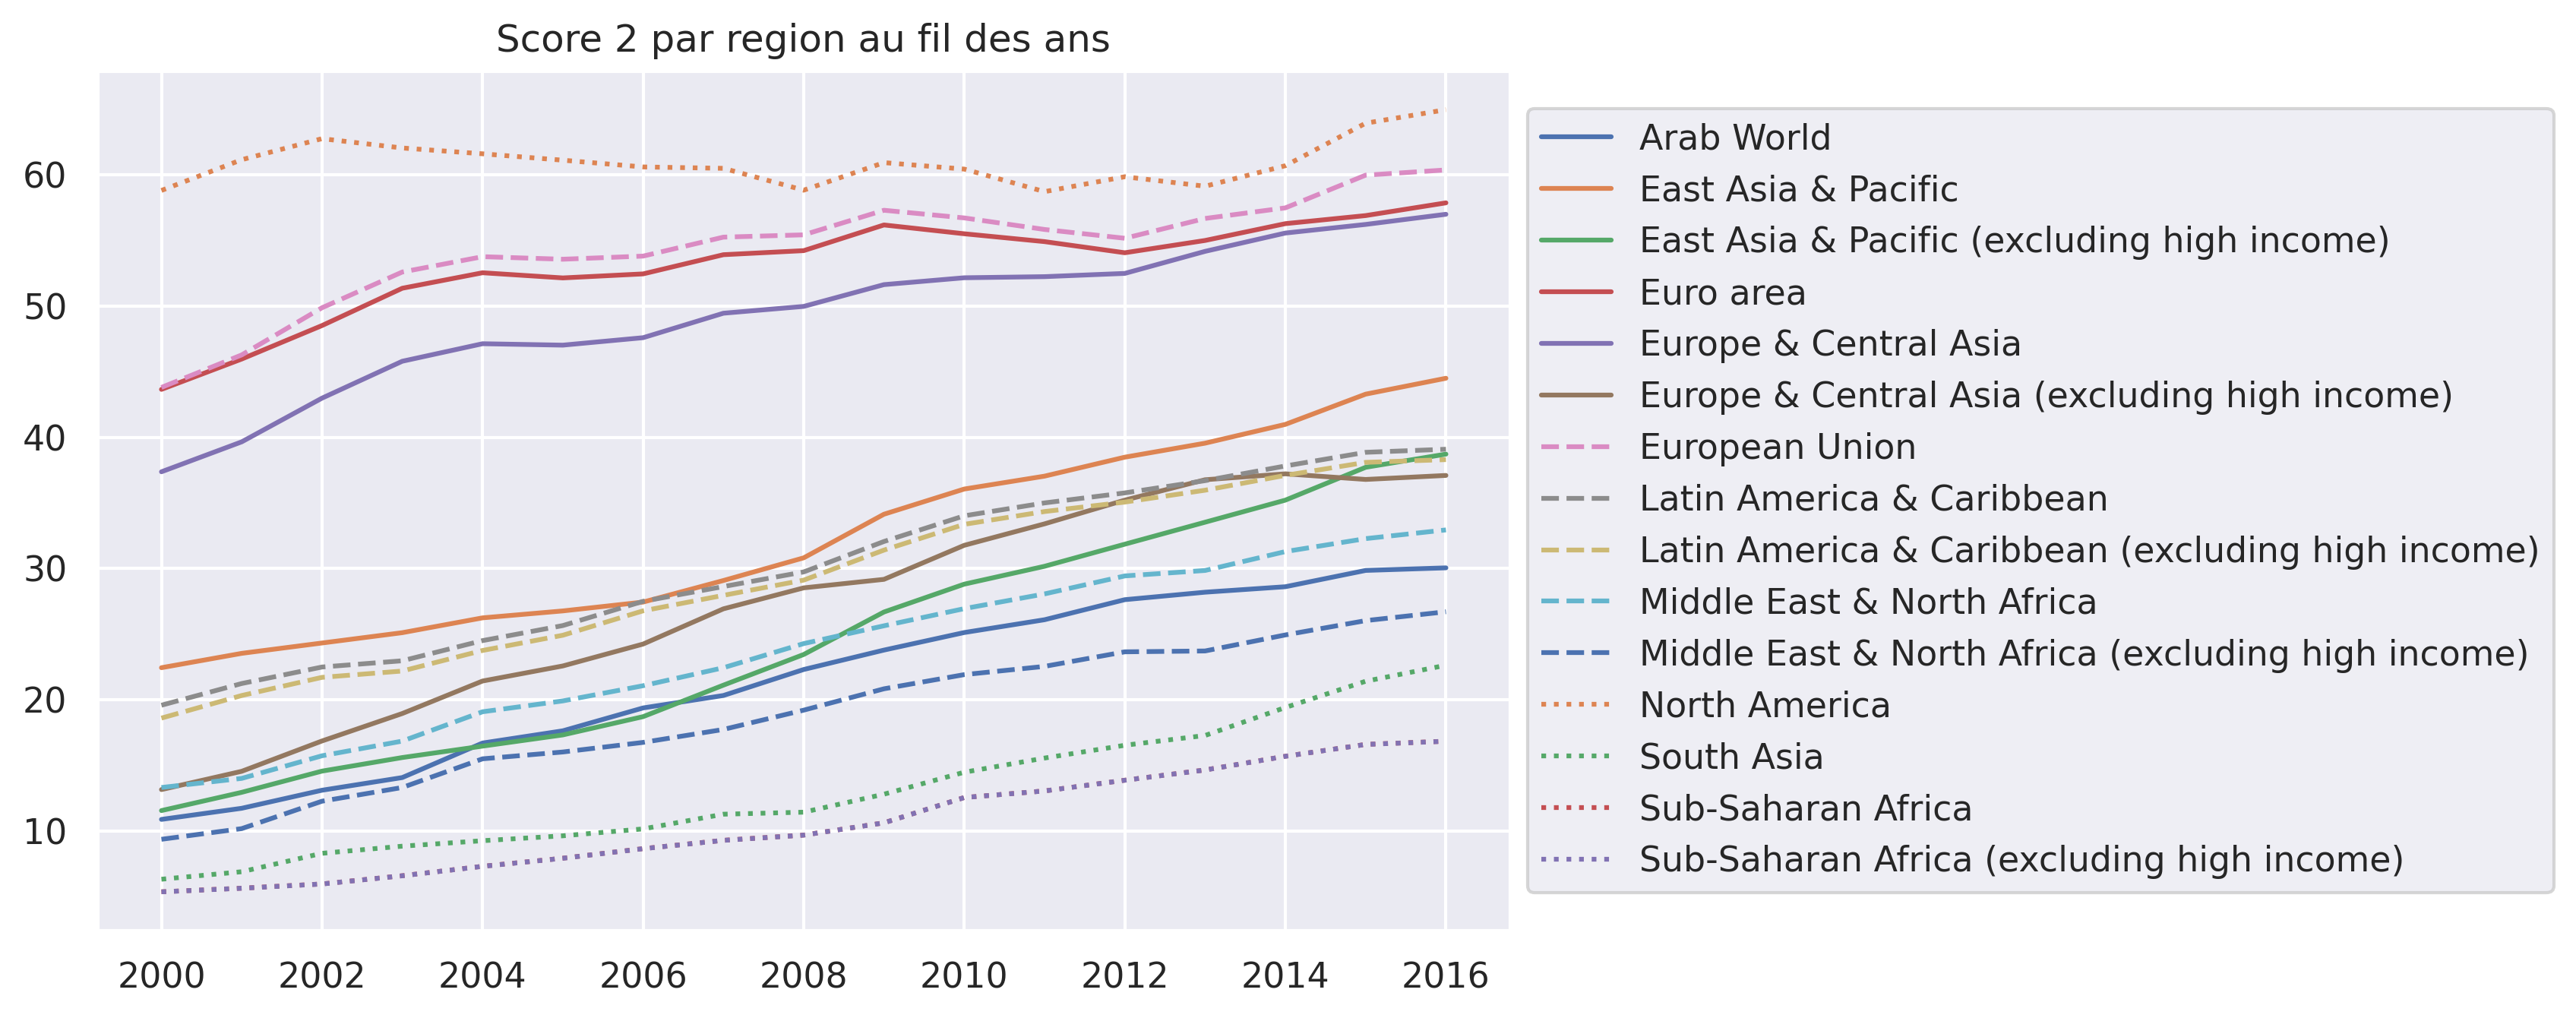

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=300)
ax.set_title("Score 2 par region au fil des ans")
for r in regions[:6] :
    ax.plot(annees_int, SCO2[r], label=r, linestyle='-')
for r in regions[6:11] :
    ax.plot(annees_int, SCO2[r], label=r, linestyle='--')
for r in regions[11:] :
    ax.plot(annees_int, SCO2[r], label=r, linestyle=':')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

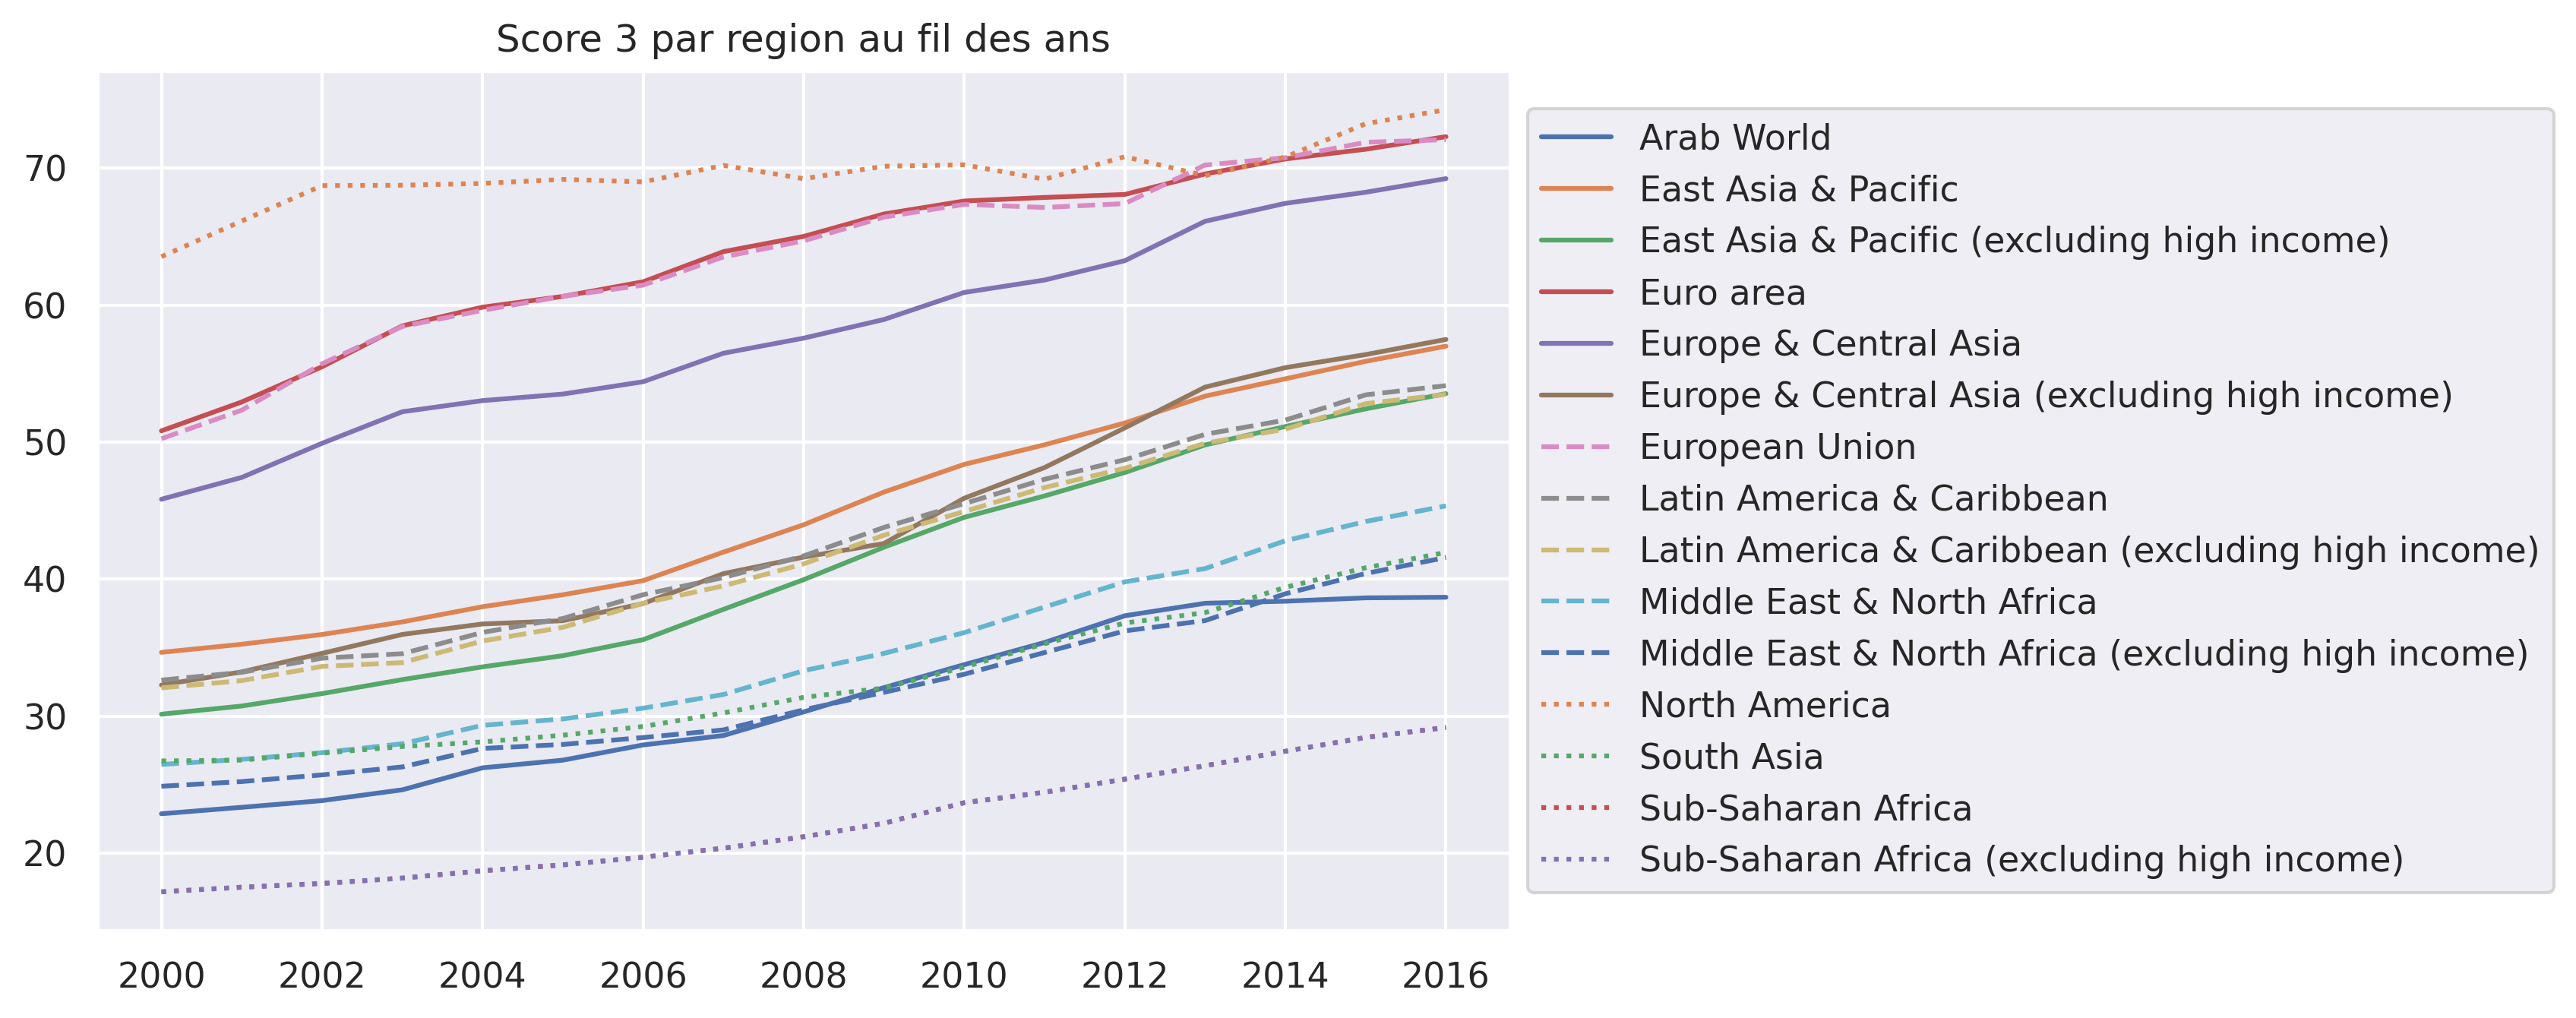

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=300)
ax.set_title("Score 3 par region au fil des ans")
for r in regions[:6] :
    ax.plot(annees_int, SCO3[r], label=r, linestyle='-')
for r in regions[6:11] :
    ax.plot(annees_int, SCO3[r], label=r, linestyle='--')
for r in regions[11:] :
    ax.plot(annees_int, SCO3[r], label=r, linestyle=':')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### <b>Tableau des scores 2016 :<b>

In [ ]:
#Création de dataframe contenant les derniers scores enregistrés
last_sco1 = []
for c in SCO1.columns :
    last_sco1.append(SCO1.loc[SCO1[c].last_valid_index(), c])
last_sco2 = []
for c in SCO2.columns :
    last_sco2.append(SCO2.loc[SCO2[c].last_valid_index(), c])
last_sco3 = []
for c in SCO3.columns :
    last_sco3.append(SCO3.loc[SCO3[c].last_valid_index(), c])
SCORES = pd.DataFrame(data=None, index=None, columns=None)
SCORES["Country Name"] = SCO1.columns
SCORES["1"] = last_sco1
SCORES["2"] = last_sco2
SCORES["3"] = last_sco3
SCORES["MEAN_SCORE"] = (SCORES["1"]+SCORES["2"]+SCORES["3"])/3
SCORES

,Country Name,1,2,3,MEAN_SCORE
0,Albania,39.058745,18.580746,50.496514,36.045335
1,Argentina,48.810838,35.644544,59.858979,48.104787
2,Australia,71.568031,51.266400,83.345451,68.726627
3,Austria,60.063493,40.824325,69.716853,56.868223
4,Belgium,69.229875,44.936150,82.549782,65.571936
...,...,...,...,...,...
73,Middle East & North Africa (excluding high inc...,37.010757,26.708768,41.584296,35.101274
74,North America,68.890734,64.945859,74.264198,69.366930
75,South Asia,44.222825,22.633485,41.955483,36.270598
76,Sub-Saharan Africa,31.236684,16.849873,29.180589,25.755715


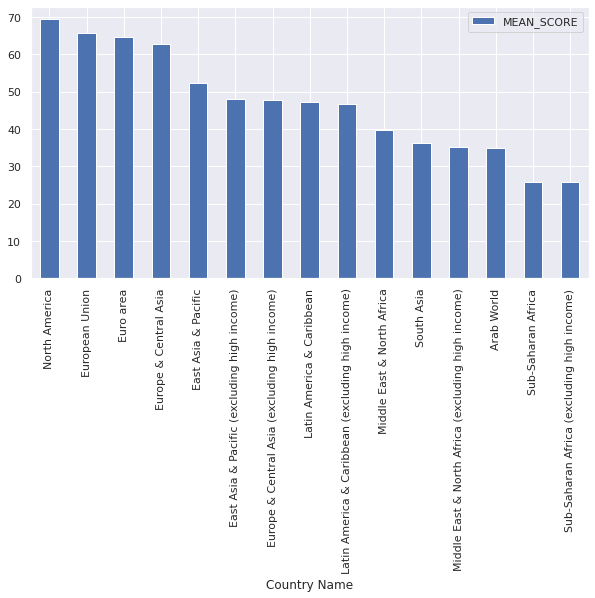

In [ ]:
temp = SCORES.sort_values(by='MEAN_SCORE', ascending=False)
temp = temp[temp["Country Name"].isin(regions)]
temp = temp[["Country Name", "MEAN_SCORE"]]
temp.plot.bar("Country Name", "MEAN_SCORE", figsize=(10,5))

### <b> Classification des pays : </b>

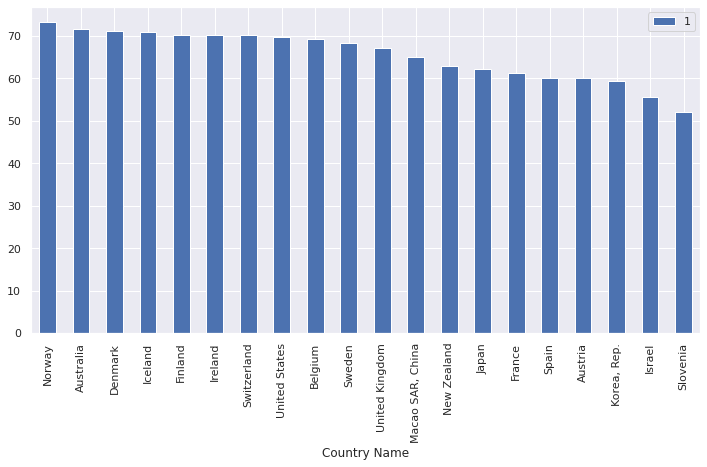

In [ ]:
temp = SCORES.sort_values(by='1', ascending=False)
temp = temp[temp["Country Name"].isin(pays_only)]
temp = temp[["Country Name", "1"]].head(20)
temp.plot.bar("Country Name", "1", figsize=(12,6))

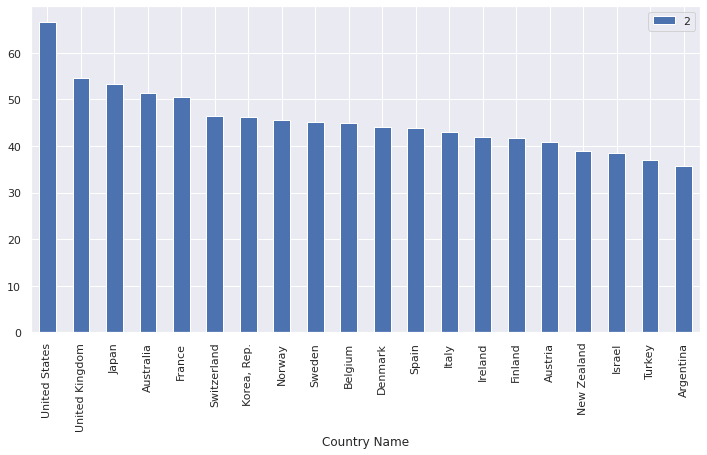

In [ ]:
temp = SCORES.sort_values(by='2', ascending=False)
temp = temp[temp["Country Name"].isin(pays_only)]
temp = temp[["Country Name", "2"]].head(20)
temp.plot.bar("Country Name", "2", figsize=(12,6))

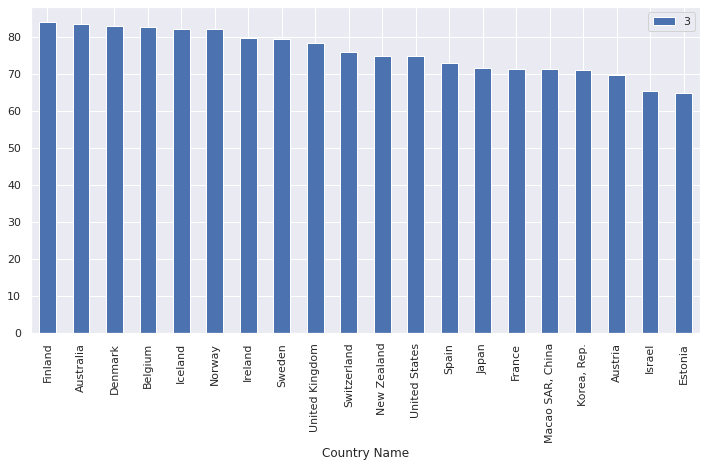

In [ ]:
temp = SCORES.sort_values(by='3', ascending=False)
temp = temp[temp["Country Name"].isin(pays_only)]
temp = temp[["Country Name", "3"]].head(20)
temp.plot.bar("Country Name", "3", figsize=(12,6))

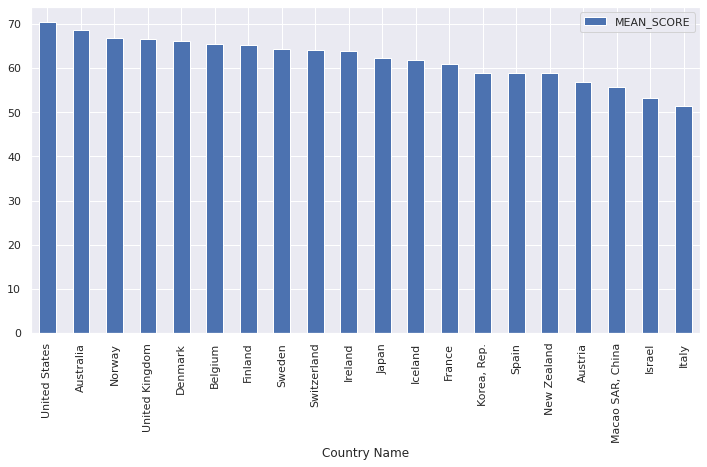

In [ ]:
temp = SCORES.sort_values(by='MEAN_SCORE', ascending=False)
temp = temp[temp["Country Name"].isin(pays_only)]
temp = temp[["Country Name", "MEAN_SCORE"]].head(20)
temp.plot.bar("Country Name", "MEAN_SCORE", figsize=(12,6))

In [ ]:
temp = SCORES.sort_values(by='MEAN_SCORE', ascending=False)
temp = temp[temp["Country Name"].isin(pays_only)]
temp[["Country Name", "MEAN_SCORE"]].head(10)

,Country Name,MEAN_SCORE
60,United States,70.362185
2,Australia,68.726627
44,Norway,66.900388
59,United Kingdom,66.587290
15,Denmark,66.047392
4,Belgium,65.571936
18,Finland,65.255908
52,Sweden,64.252867
53,Switzerland,64.143425
25,Ireland,63.904040
